![](image/icon1.png) ![](image/icon2.png) ![](image/icon3.png)  
>**Projet Informatique L2** **UT3 Paul Sabatier**  
>**Paul Chiapello**   
>**Eliot Jenny**

***
# Caractéristiques des moteurs d'avion à pistons
***

## Objectif:

L'objectif de ce projet consiste à analyser un ensemble de données relatives aux caractéristiques des moteurs d'avions à pistons et à en déduire des conclusions. L'analyse se concentrera exclusivement sur les moteurs à pistons, étant donné que les données relatives aux autres types de moteurs tels que les moteurs à réaction ou les moteurs de fusée ne sont pas suffisamment enrichies.

## Déroulé du projet: 

1) Dans un premier temps, une compréhension du sujet sera établie, permettant d'établir les notions clés et de définir un plan de déroulement du projet.
2) Dans un deuxième temps, le fichier Excel sera restructuré et les unités de mesure seront converties en unités internationales.
3) Enfin, dans un troisième temps, le fichier sera analysé à l'aide de graphiques et d'outils d'analyse afin d'en tirer des conclusions.
***

# Partie 1: Compréhension du sujet:
***
Les moteurs d'avions sont des éléments clés de tout avion. Ils sont responsables de fournir la poussée nécessaire pour propulser l'avion dans les airs et le maintenir en mouvement. Dans le contexte de ce projet, nous nous intéressons aux moteurs à piston utilisés en aéronautique, qui sont le plus souvent des moteurs thermiques à quatre temps.

Voici un exemple d'un moteur à piston 4 temps :
 
 ![Moteur 4 temps cycle](image/cycle-image-4-temps.png)
 
Le mode de fonctionnement de ce type de moteur peut être décrit en quatre étapes successives :

- L'admission : l'essence (actuellement de l'AVGAS 100LL) et l'air sont injectés dans le moteur.
- La compression : le mélange est comprimé et le piston atteint le point le plus haut de sa course.
- L'explosion : une étincelle de la bougie déclenche l'explosion du mélange comprimé.
- L'échappement : les gaz brûlés s'échappent et le piston se trouve au point le plus bas de sa course.

Les performances du moteur dépendent donc de certaines caractéristiques telles que le volume du piston, la hauteur du piston du point le plus haut au point le plus bas, le taux de compression, etc. Ces caractéristiques seront examinées en détail.

Les avions sont équipés de ce type de moteur, mais avec plusieurs cylindres disposés dans différentes configurations, telles que les moteurs d'avion en étoile et les moteurs en V. Voici quelques exemples de ces configurations :
  
 - Moteur en étoile:
 
 ![Moteur en étoile](image/Moteur_etoile.png)
  
 - Moteur en V:
 
  ![Moteur en V](image/Moteur_v.png)
  
Une fois familiarisés avec le sujet, nous sommes en mesure de comprendre les colonnes du tableau Excel qui sont rédigées en anglais. Nous allons procéder à la traduction de ces colonnes et supprimer celles qui ne sont pas pertinentes pour ce projet. Les cases à cocher ci-dessous indiquent les colonnes que nous retiendrons pour notre tableau final :

- [x] Type = Nom Moteur
- [ ] Ordered = Commandé
- [ ] Delivered = Livré
- [ ] Modified = Modifié
- [ ] Cancelled = Annulé
- [ ] Test = Test
- [ ] Manufacturer Model = Modèle du Fabriquant
- [x] Bore = Alésage (diamètre du trou du cylindre)
- [x] Stroke = Course Piston (Hauteur du Piston du point haut au point bas)
- [x] IN^3 = Cylindrées (Volume de la chambre de combustion)
- [ ] IN^3 = Même colonne mais convertie 
- [x] Number = Nombre de Cylindre
- [ ] Rows = Nombre de ligne de cylindre
- [x] Arrangement = configurations cylindre
- [x] Cooling = Type de refroidissment
- [ ] Intake = Nombre d'injecteurs
- [ ] Exhaust = Nombre de valve d'échappement
- [ ] Arrangement Number = Trop peux de donner
- [x] CR = Taux de Compression
- [ ] Gear Ratio = Rapport de Transmission
- [x] Weight = Poids Moteur
- [x] HP = Puissance moteur en chevaux
- [x] @ RPM = Tours par minutes 
- [x] Aircraft = Aéronef 
- [ ] Service = Service Client
- [ ] Source = Source de données
- [ ] Notes = Commentaires
***

# Partie 2: Importation du fichier et réorganisation:
***
Avant de commencer le projet, nous avons procédé à l'installation de nos interpréteurs Python et de nos terminaux à l'aide de GitBash. Nous avons ensuite créé un dépôt sur GitHub pour travailler en collaboration, voici le lien : [Projet_L2_Info](https://github.com/Paulciapello/Projet_Info_L2.git)

Nous avons décidé d'utiliser l'interpréteur Jupyter en raison de sa simplicité et de la possibilité de créer un rapport directement dans l'environnement. Cependant, nous avons rencontré plusieurs problèmes de téléchargement et de compatibilité, ce qui nous a pris environ deux heures pour les résoudre.


#### Import du fichier:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt    # importations des modules utiles pour ce projet.
import numpy as np
from scipy.linalg import lstsq
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_excel('Engine.xls')  #importations du fichier excel

#### Ajout, suppression, renommage et réorganisation des colonnes, lignes

In [2]:
df = df.set_axis(df.iloc[2], axis='columns')      # mise en place de l'en-tête
df.drop([2],inplace=True)  

df.columns.values[11] = 'Cylindrées_cm^3'   
df.columns.values[13] = 'Nb_Cylindres'     
df.columns.values[15] = 'Config_Moteurs'   # renommage des noms de colonnes doublé 

##### Supression colonnes, lignes:

In [3]:
df.drop(df.columns[27:], axis=1, inplace=True) # suppression des colonnes vides

In [4]:
# suppression des colonnes inutiles
df.drop(['Manufacturer', 'Ordered', 'Delivered',
         'Modified','Cancelled', 'Test','Manufacturer Model',
         'Rows','IN^3','Number','Exhaust','Intake','Arrangement','Gear Ratio'], axis=1, inplace=True)  

In [5]:
df.dropna(thresh=3, inplace=True)    # Supression de ligne si il y a moins de 3 valeurs non vide 

##### Renommages colonnes

In [6]:
#renommage des colonnes
df.rename(columns = {'Type' : 'Nom_moteur',
                    'Bore' : 'Alesage_mm',
                    'Stroke' : 'Course_Piston_mm',
                     'Cooling' : 'Refroidissement',
                     'CR' : 'Taux de compression',
                     'Weight' : 'Poids_Moteurs_kg',
                     'HP' : 'Puissance_Moteurs_kwatt',
                     '@ RPM' : 'Tours_minutes',
                     'Aircraft' : 'Aéronef',
                      }, inplace=True)

#### Reorganisation colonnes

In [7]:
#réorganisation des colonnes
reorga_colonnes = ['Nom_moteur','Aéronef','Puissance_Moteurs_kwatt',
                   'Poids_Moteurs_kg','Cylindrées_cm^3',
                   'Taux de compression','Alesage_mm',
                   'Course_Piston_mm','Tours_minutes',
                   'Config_Moteurs','Nb_Cylindres','Refroidissement'
                  ]
df = df[reorga_colonnes]    

### Conversion données

##### Création de fonctions de convertions

In [8]:
#créations de fonctions de convertions
def inch_to_mm(inch):
    """ 
    convertion pouce en mm 
    """
    return inch * 25.4

def in3_to_cm3(in3):
    """ 
    convertion poucecube en cmcube
    """
    return in3 * 16.39

def lbs_to_kg(lbs):
    """ 
    convertion livre en kg
    """
    return lbs * 0.45359237

def ch_to_kwatt(ch):
    """ 
    convertion chevaux en kwatt
    """
    return ch * 0.735499



##### Convertion colonnes en float

In [9]:
# variable des colonnes que l'on veux convertir en float
cols_to_convert = ['Puissance_Moteurs_kwatt','Alesage_mm','Course_Piston_mm',
                   'Poids_Moteurs_kg','Cylindrées_cm^3','Taux de compression',
                  'Tours_minutes','Nb_Cylindres']

#Pour convertir les colonnes contenant des str en float (utilisation de chat gpt pour la fonction applymap(...)
df[cols_to_convert] = df[cols_to_convert].applymap(lambda x: float(x) if str(x).replace('.','',1).isdigit() else None)
df[cols_to_convert] = df[cols_to_convert].astype(float) #convertion en float

##### Convertions colonnes en unité international

In [10]:
# variable des colonnes que l'on convertira en mm
cols_to_inch_to_mm = ['Alesage_mm','Course_Piston_mm'] 

# Convertion des colonnes en unitées internationnal
df[cols_to_inch_to_mm] = df[cols_to_inch_to_mm].apply(inch_to_mm)
df['Poids_Moteurs_kg'] = df['Poids_Moteurs_kg'].apply(lbs_to_kg)
df['Puissance_Moteurs_kwatt'] = df['Puissance_Moteurs_kwatt'].apply(ch_to_kwatt)
df['Cylindrées_cm^3'] = df['Cylindrées_cm^3'].apply(in3_to_cm3)

In [11]:
df.head()

2,Nom_moteur,Aéronef,Puissance_Moteurs_kwatt,Poids_Moteurs_kg,Cylindrées_cm^3,Taux de compression,Alesage_mm,Course_Piston_mm,Tours_minutes,Config_Moteurs,Nb_Cylindres,Refroidissement
5,NaN,NaN,257.424650,319.782621,19003.756581,NaN,120.0,140.0,2000.0,Y,12.0,L
6,Dragonfly I,(Clark Pursuit),235.359680,297.556595,22779.809086,4.42,139.7,165.1,1650.0,R,9.0,A
7,Dragonfly IA,Dragon,264.779640,NaN,22779.809086,4.42,139.7,165.1,NaN,R,9.0,A
8,Gnat,Martin K.III,33.097455,37.194574,2281.204907,3.80,110.0,120.0,1920.0,O,2.0,A
9,Mosquito,NaN,91.937375,81.646627,5104.431641,4.05,95.0,120.0,1700.0,R,6.0,A


Nous avons donc procédé à la réorganisation des colonnes avec les unités appropriées et supprimé les colonnes inutiles ou contenant trop peu de données. Nous pouvons désormais analyser ces données afin d'en tirer des conclusions.
***

# Partie 3: Analyse du tableaux
***
Dans cette Partie nous allons analyser le tableaux des moteur d'avions à l'aide d'outil telle que des graph ou des fonctions.
Les graph sont composé de :

> matrice de graphiques (subplot)

> graphique statistique (voir les exemples sur matplolib)

> graphique avec des symboles et des lignes 

> graphique bar

> graphique camembert

> graphique 3D (choix variées)


In [12]:
df.describe()

2,Puissance_Moteurs_kwatt,Poids_Moteurs_kg,Cylindrées_cm^3,Taux de compression,Alesage_mm,Course_Piston_mm,Tours_minutes,Nb_Cylindres
count,1537.000000,247.000000,772.000000,217.000000,733.000000,732.000000,326.000000,767.000000
mean,612.316914,328.552747,19028.513094,5.113461,125.837217,149.879154,1617.193252,9.576271
std,635.304740,163.035550,15305.892566,0.491518,19.447658,28.512721,386.169380,4.868142
min,4.412994,37.194574,0.000000,3.750000,57.150000,53.848000,900.000000,1.000000
25%,154.454790,223.167446,9010.873129,4.760000,114.300000,130.175000,1400.000000,6.000000
50%,367.749500,290.072321,15894.790079,5.100000,127.000000,152.400000,1600.000000,9.000000
75%,882.598800,408.233133,26917.935912,5.420000,139.700000,170.000000,1800.000000,12.000000
max,3677.495000,1016.046909,153236.333891,6.555000,219.075000,228.600000,6000.000000,42.000000


Au préalable, nous avons utilisé la fonction "describe", laquelle permet de décrire de manière sommaire toutes les valeurs numériques en fournissant leur moyenne, leur nombre, ainsi que leur valeur minimale et maximale pour chaque colonne.
***

### Graph 1: Rapport entre la puissance et d'autre données (subplot, lignes, symboles et courbe de régression)

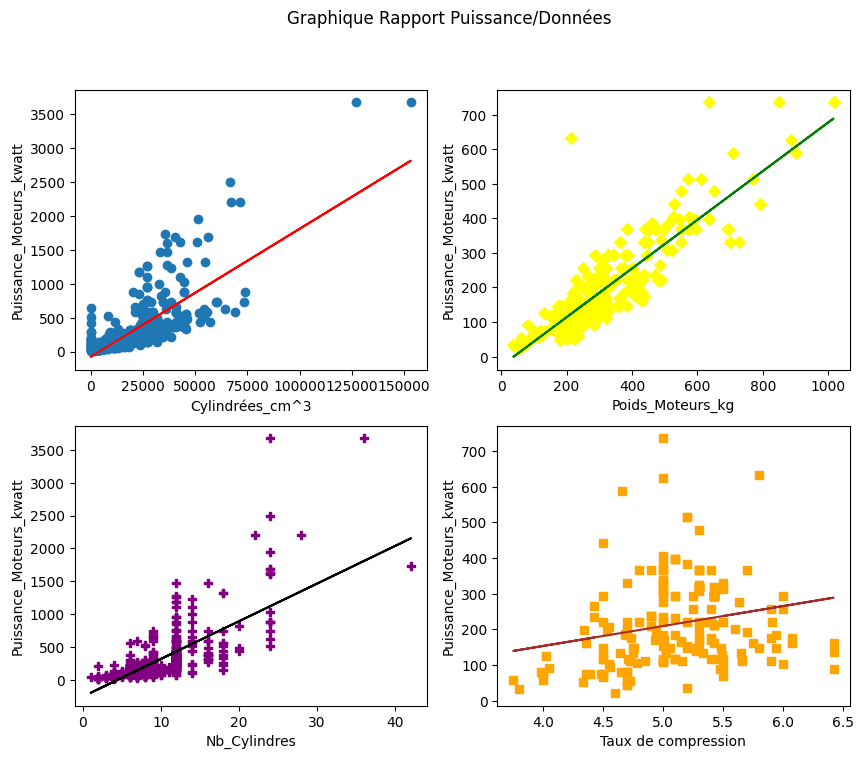

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Graphique Rapport Puissance/Données')

# Supprimer les valeurs manquantes
df1 = df.dropna(subset=['Puissance_Moteurs_kwatt', 'Cylindrées_cm^3'])

# Définir les variables x et y
x1 = 'Cylindrées_cm^3'
y = 'Puissance_Moteurs_kwatt'

# Calcul des coefficients de régression
A = np.vstack([df1[x1], np.ones(len(df1))]).T
m, c = np.linalg.lstsq(A, df1[y], rcond=None)[0]

# Tracer le graphique de points et la ligne de régression
axes[0, 0].scatter(df1[x1], df1[y])
axes[0, 0].plot(df1[x1], m * df1[x1] + c, 'r')

# Définir le titre des axes
axes[0, 0].set_xlabel(x1)
axes[0, 0].set_ylabel(y)

# Supprimer les valeurs manquantes
df2 = df.dropna(subset=['Puissance_Moteurs_kwatt', 'Poids_Moteurs_kg'])

# Définir les variables x et y
x2 = 'Poids_Moteurs_kg'
y = 'Puissance_Moteurs_kwatt'

# Calcul des coefficients de régression
A = np.vstack([df2[x2], np.ones(len(df2))]).T
m, c = np.linalg.lstsq(A, df2[y], rcond=None)[0]

# Tracer le graphique de points et la ligne de régression
axes[0, 1].scatter(df2[x2], df2[y], color='yellow', marker='D')
axes[0, 1].plot(df2[x2], m * df2[x2] + c, 'g')

# Définir le titre des axes
axes[0, 1].set_xlabel(x2)
axes[0, 1].set_ylabel(y)

# Supprimer les valeurs manquantes
df3 = df.dropna(subset=['Puissance_Moteurs_kwatt', 'Nb_Cylindres'])

# Définir les variables x et y
x3 = 'Nb_Cylindres'
y = 'Puissance_Moteurs_kwatt'

# Calcul des coefficients de régression
A = np.vstack([df3[x3], np.ones(len(df3))]).T
m, c = np.linalg.lstsq(A, df3[y], rcond=None)[0]

# Tracer le graphique de points et la ligne de régression
axes[1, 0].scatter(df3[x3], df3[y], color='purple', marker='P')
axes[1, 0].plot(df3[x3], m * df3[x3] + c, color='black')

# Définir le titre des axes
axes[1, 0].set_xlabel(x3)
axes[1, 0].set_ylabel(y)

# Supprimer les valeurs manquantes
df4 = df.dropna(subset=['Puissance_Moteurs_kwatt', 'Taux de compression'])

# Définir les variables x et y
x4 = 'Taux de compression'
y = 'Puissance_Moteurs_kwatt'

# Calcul des coefficients de régression
A = np.vstack([df4[x4], np.ones(len(df4))]).T
m, c = np.linalg.lstsq(A, df4[y], rcond=None)[0]

# Tracer le graphique de points et la ligne de régression
axes[1, 1].scatter(df4[x4], df4[y], color='orange', marker='s')
axes[1, 1].plot(df4[x4], m * df4[x4] + c, color='brown')

# Définir le titre des axes
axes[1, 1].set_xlabel(x4)
axes[1, 1].set_ylabel(y)

plt.show()

Nous avons créé une matrice de graphique comparant la puissance en fonction de plusieurs variables telles que la cylindrée, le poids, le nombre de cylindres et le taux de compression. Nous avons également utilisé les courbes de régression pour évaluer les tendances. À la lumière de ces analyses, nous avons pu établir les conclusions suivantes :

1) La puissance du moteur est positivement corrélée à la cylindrée, ce qui signifie que plus la cylindrée est grande, plus le moteur est puissant.
2) Le poids du moteur est également positivement corrélé à la puissance, ce qui implique qu'un moteur plus lourd est plus puissant.
3) La puissance est directement proportionnelle au nombre de cylindres, ce qui implique que plus le nombre de cylindres est élevé, plus la puissance est élevée.
4) Le taux de compression est également positivement corrélé à la puissance, ce qui suggère qu'un moteur avec un taux de compression élevé est plus puissant.

**En conclusion, nous pouvons affirmer que la puissance du moteur est liée à sa taille, à savoir la taille de ses cylindres, son poids, son nombre de cylindres, ainsi qu'à son taux de compression. En effet, une plus grande surface de compression est un indicateur de performance accrue, ce qui se traduit par une puissance supérieure.**
***

### Graph 2: Comparaison des types de Refroidissement à l'aide de données (Graphique bar et statistiques)

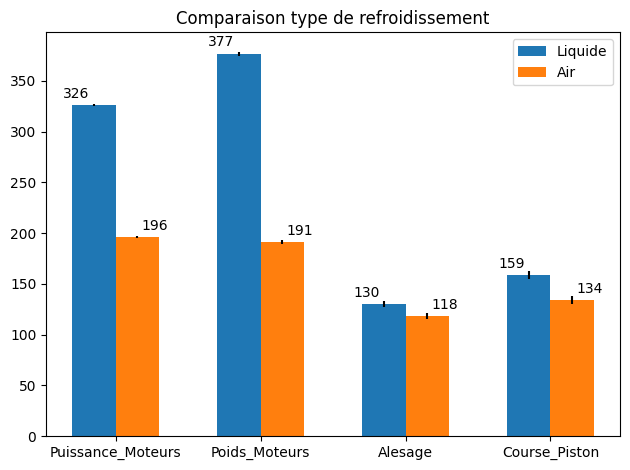

In [14]:
# Sélection des lignes du DataFrame où la colonne "Refroidissement" est égale à "L"
df_L = df[df['Refroidissement'] == 'L']

# Sélection des lignes du DataFrame où la colonne "Refroidissement" est égale à "A"
df_A = df[df['Refroidissement'] == 'A']

# Sélection des colonnes à conserver dans les DataFrames filtrés
cols_to_keep = ['Puissance_Moteurs_kwatt', 'Poids_Moteurs_kg','Alesage_mm','Course_Piston_mm']

# Création de nouveaux DataFrames avec les colonnes filtrées
df_L_x = df_L.loc[:, cols_to_keep]
df_A_x = df_A.loc[:, cols_to_keep]

# Calcul des moyennes des colonnes numériques pour les deux DataFrames filtrés
Moyennes_L = df_L_x.mean(numeric_only=True).tolist()
Moyennes_A = df_A_x.mean(numeric_only=True).tolist()

# Conversion des valeurs moyennes en entiers
Moyennes_L = list(map(int, Moyennes_L))
Moyennes_A = list(map(int, Moyennes_A))

# Définition des moyennes pour chaque type de refroidissement
type_std = (1,2,3,4)

ind = np.arange(len(Moyennes_L))  
width = 0.3 

# Création des bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, Moyennes_L ,width, yerr=type_std,
                label='Liquide')
rects2 = ax.bar(ind + width/2, Moyennes_A, width, yerr=type_std,
                label='Air')

# Configuration du graphique
ax.set_title('Comparaison type de refroidissement')
ax.set_xticks(ind)
ax.set_xticklabels(('Puissance_Moteurs','Poids_Moteurs','Alesage','Course_Piston'))
ax.legend()

# Ajout des annotations
def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),
                    textcoords="offset points",
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
plt.show()

Nous avons créé un graphique statistique en barres qui présente la moyenne des données telles que la puissance, le poids, l'alésage et la course du piston en fonction du type de refroidissement : liquide ou air. Nous avons utilisé un exemple de graphique sur Matplotlib et l'avons modifié pour créer notre propre graphique.

**Nous sommes arrivés à la conclusion que les moteurs à refroidissement liquide sont plus performants et plus puissants que ceux à refroidissement par air. Cette conclusion suggère que la méthode de refroidissement est un facteur important à considérer lors du choix d'un moteur pour une application donnée. Les performances et la puissance du moteur peuvent être grandement affectées par le type de refroidissement utilisé.**
***

### Graph 3: Pourcentage du type de configurations moteurs (Graphique camembert)

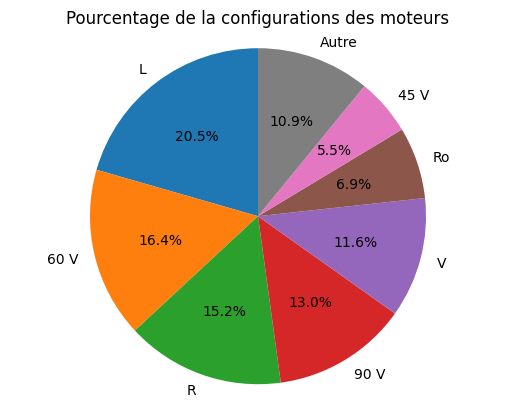

In [15]:
# extraire les données de la colonne du dataframe
counts = df['Config_Moteurs'].value_counts()
total = counts.sum()
labels = counts.index.tolist()

# définir les seuils pour les valeurs à remplacer
threshold = 0.03
others = counts[counts/total < threshold]

# remplacer les valeurs inférieures à 5% par "Autre"
counts = counts.drop(others.index)
counts['Autre'] = others.sum()

# création du graphique
fig, ax = plt.subplots()
ax.pie(counts, labels=counts.index.tolist(), autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # rendre le cercle parfait
ax.set_title('Pourcentage de la configurations des moteurs')

plt.show()

Le graphique en camembert présentant les différentes configurations de moteurs indique que la configuration en V est la plus courante, suivie par la configuration en étoile, puis celle en ligne. 

**Cette observation suggère que les ingénieurs ont peut-être une préférence pour les moteurs en V en raison de leur puissance et de leurs performances supérieures, tandis que les moteurs en étoile sont peut-être utilisés pour leur fiabilité et leur efficacité en aéronautique, et les moteurs en ligne pour leur configuration plus compacte ou légère.** 

Cependant, d'autres facteurs tels que le coût, la maintenance et la disponibilité des pièces de rechange peuvent également jouer un rôle dans le choix de la configuration de moteur pour une application donnée.
***

### Graph 4: Graphique 3d de l'alésage et la course piston suivant la cylindrées.

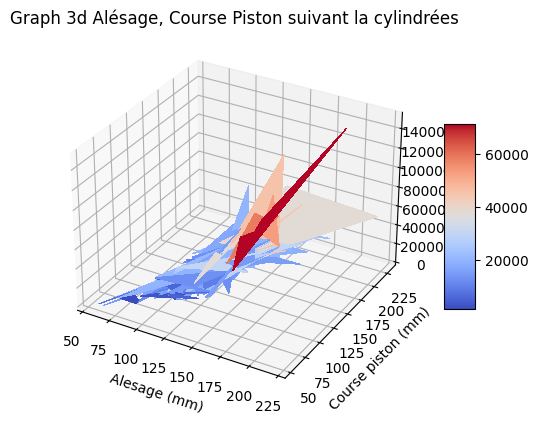

In [16]:
# Conversion de la colonne en matrice 2D
z = np.reshape(df['Cylindrées_cm^3'].values, (4, -1))

# Création de la figure et des axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracé du graphique 3d
surf = ax.plot_surface(df['Alesage_mm'].values.reshape((4, -1)), 
                df['Course_Piston_mm'].values.reshape((4, -1)), 
                z, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=6)

# Configuration de l'affichage
ax.set_xlabel('Alesage (mm)')
ax.set_ylabel('Course piston (mm)')
ax.set_title('Graph 3d Alésage, Course Piston suivant la cylindrées')

plt.show()

Ce graphique a été crée pour mettre en évidence la corrélation entre la cylindrée d'un moteur et deux de ses paramètres clés: l'alésage et la course piston. L'alésage représente le diamètre de la surface intérieure du cylindre où se déplace le piston, tandis que la course piston correspond à la distance parcourue par le piston lors d'un cycle du moteur.

En jouant sur l'alésage et/ou la course piston, la cylindrée du moteur peut être modifiée, ce qui a pour effet d'influer sur sa puissance. Toutefois, pour obtenir des performances optimales pour une application spécifique, il est nécessaire de trouver le bon équilibre entre ces trois facteurs.

Le graphique présente les données de l'alésage et de la course piston en fonction de la cylindrée. On peut constater qu'une augmentation de la cylindrée se traduit généralement par une augmentation de l'alésage et de la course piston.

**En résumé, l'alésage et la course piston sont des éléments clés qui ont une influence significative sur la cylindrée et la puissance d'un moteur. Les ingénieurs et concepteurs de moteurs doivent donc trouver le bon équilibre entre ces facteurs pour atteindre les performances optimales pour une application spécifique.**

***
# Conclusion
***

**En conclusion, l'analyse du tableau des moteurs à piston a révélé des corrélations significatives entre la puissance et plusieurs variables clés telles que la cylindrée, le poids, le nombre de cylindres et le taux de compression. Il a également été identifié que le type de refroidissement est un facteur important pour la performance et la puissance du moteur. La configuration en V est la plus répandue, suivie par la configuration en étoile, puis celle en ligne. Enfin, l'alésage et la course piston ont été identifiés comme des éléments clés qui ont une influence significative sur la cylindrée et la puissance d'un moteur. Les ingénieurs doivent trouver le juste équilibre entre ces facteurs pour obtenir des performances optimales pour une application donnée. En somme, l'analyse des moteurs à piston souligne l'importance de la conception de ces mécanismes pour garantir leur efficacité et leur performance.**
***

# Ressources et erreurs rencontrées
***

Pour ce projet, nous avons utilisé le cours d'informatique disponible sur Moodle, ainsi que des exemples de graphiques provenant du site de Matplotlib, notamment pour les graphiques 2 et 4. Nous avons également consulté Internet, YouTube et Chat GPT pour les fonctions que nous ne savions pas créer avec les autres ressources.

Cependant, nous avons rencontré de nombreuses erreurs, notamment lors de la conversion entre les données du tableau et les interprétations dans les graphiques, ainsi que lors de l'installation de toutes les ressources sur Git Bash et de l'utilisation de GitHub, etc.
Nous n'avons pas pu créer de graphique isoline car pour nous le sujet n'est pas fait pour créer ce type de graphique.
Nous avons aussi eu des difficultés sur la compréhension du sujet, notamment pour la traduction de termes spécifiques en mécanique qui sont très difficiles à traduire.

Malgré ces difficultés, nous avons particulièrement apprécié ce projet, car il nous a permis d'approfondir considérablement nos connaissances en matière de science des données.

**Voici le liens des ressources:**    
>[Projet sur github](https://github.com/Paulciapello/Projet_Info_L2.git) (Ne vous fiez pas à la date des commits sur GitHub le projet a été réfléchi est créé dès le départ de l'affectation des projets, mais le repository a été créé bien plus tard)   
>[Exemples Matplotlib](https://matplotlib.org/3.1.0/gallery/index.html) (Graph 2 et 4)  
>[Cours Moodle](https://moodle.univ-tlse3.fr/pluginfile.php/662236/mod_resource/content/11/co/CourbeTendance.html)

Si vous rencontrez des problèmes d'interprétation, d'implémentation ou de compréhension, contactez-nous directement sur GitHub ou par e-mail à l'adresse suivante : paul.chiapello@univ-tlse3.fr
